# PROJETO 4 - TED TALKS

### Importações

In [1]:
import pandas as pd
import numpy as np
import re
import json
import requests
import seaborn as sns
%matplotlib inline
import ast
import matplotlib.pyplot as plt

### Organização do DataFrame

In [2]:
# Importando o dataset

tedtalks = pd.read_csv("ted_main.csv")

In [3]:
# Visualização

tedtalks.head()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
# Ver e alterar os tipos de colunas

tedtalks.dtypes


comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [5]:
# Pegando os nomes das colunas

tedtalks.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [6]:
# Corrigindo os nomes

tedtalks.columns = ['Comments', 'Description', 'Duration', 'Event', 'Film_Date',
       'Languages', 'Main_Speaker', 'Name', 'Num_Speaker', 'Published_Date',
       'Ratings', 'Related_Talks', 'Speaker_Occupation', 'Tags', 'Title',
       'URL', 'Views']


In [7]:
# Alterando a ordem

column_order = ['Event', 'Title','Description', 'Duration','Main_Speaker', 'Speaker_Occupation','Num_Speaker', 'Languages',
                'Film_Date', 'Published_Date', 'Name', 'Related_Talks', 'URL', 'Tags', 'Ratings', 'Views','Comments' ]

tedtalks = tedtalks[column_order]

tedtalks.head()

,Event,Title,Description,Duration,Main_Speaker,Speaker_Occupation,Num_Speaker,Languages,Film_Date,Published_Date,Name,Related_Talks,URL,Tags,Ratings,Views,Comments
0,TED2006,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,1164,Ken Robinson,Author/educator,1,60,1140825600,1151367060,Ken Robinson: Do schools kill creativity?,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,"['children', 'creativity', 'culture', 'dance',...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,4553
1,TED2006,Averting the climate crisis,With the same humor and humanity he exuded in ...,977,Al Gore,Climate advocate,1,43,1140825600,1151367060,Al Gore: Averting the climate crisis,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,"['alternative energy', 'cars', 'climate change...","[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,265
2,TED2006,Simplicity sells,New York Times columnist David Pogue takes aim...,1286,David Pogue,Technology columnist,1,26,1140739200,1151367060,David Pogue: Simplicity sells,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,"['computers', 'entertainment', 'interface desi...","[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,124
3,TED2006,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",1116,Majora Carter,Activist for environmental justice,1,35,1140912000,1151367060,Majora Carter: Greening the ghetto,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,"['MacArthur grant', 'activism', 'business', 'c...","[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,200
4,TED2006,The best stats you've ever seen,You've never seen data presented like this. Wi...,1190,Hans Rosling,Global health expert; data visionary,1,48,1140566400,1151440680,Hans Rosling: The best stats you've ever seen,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,"['Africa', 'Asia', 'Google', 'demo', 'economic...","[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,593


In [8]:
# Dropando colunas que não fazem sentido para a análise final

tedtalks = tedtalks.drop(columns=['Film_Date', 'Published_Date', 'Name', 'Related_Talks', 
                                  'Description', 'URL', 'Duration', 'Ratings'])

In [52]:
tedtalks.head()

,Event,Title,Main_Speaker,Speaker_Occupation,Num_Speaker,Languages,Tags,Views,Comments
0,TED2006,Do schools kill creativity?,Ken Robinson,Author/educator,1,60,"[children', 'creativity', 'culture', 'dance...",47227110,4553
1346,TEDGlobal 2012,Your body language may shape who you are,Amy Cuddy,Social psychologist,1,51,"[body language', 'brain', 'business', 'psyc...",43155405,2290
677,TEDxPuget Sound,How great leaders inspire action,Simon Sinek,Leadership expert,1,45,"[TEDx', 'business', 'entrepreneur', 'leader...",34309432,1930
837,TEDxHouston,The power of vulnerability,Brené Brown,Vulnerability researcher,1,52,"[TEDx', 'communication', 'culture', 'depres...",31168150,1927
452,TED2009,10 things you didn't know about orgasm,Mary Roach,Writer,1,37,"[books', 'culture', 'history', 'humor', 's...",22270883,354


In [10]:
# Ordenando pelas palestras com maior número de views

tedtalks = tedtalks.sort_values("Views", ascending = False)

In [11]:
tedtalks.head()

,Event,Title,Main_Speaker,Speaker_Occupation,Num_Speaker,Languages,Tags,Views,Comments
0,TED2006,Do schools kill creativity?,Ken Robinson,Author/educator,1,60,"['children', 'creativity', 'culture', 'dance',...",47227110,4553
1346,TEDGlobal 2012,Your body language may shape who you are,Amy Cuddy,Social psychologist,1,51,"['body language', 'brain', 'business', 'psycho...",43155405,2290
677,TEDxPuget Sound,How great leaders inspire action,Simon Sinek,Leadership expert,1,45,"['TEDx', 'business', 'entrepreneur', 'leadersh...",34309432,1930
837,TEDxHouston,The power of vulnerability,Brené Brown,Vulnerability researcher,1,52,"['TEDx', 'communication', 'culture', 'depressi...",31168150,1927
452,TED2009,10 things you didn't know about orgasm,Mary Roach,Writer,1,37,"['books', 'culture', 'history', 'humor', 'scie...",22270883,354


### Visualização de Frequências

In [12]:
# Visualização dos palestrantes com mais TED Talks

tedtalks["Main_Speaker"].value_counts().head(10)


Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Julian Treasure         5
Jacqueline Novogratz    5
Bill Gates              5
Dan Ariely              5
Clay Shirky             5
Nicholas Negroponte     5
Name: Main_Speaker, dtype: int64

In [13]:
# Visualização das profissões mais frequentes dos palestrantes

tedtalks["Speaker_Occupation"].value_counts().head(10)

Writer          45
Artist          34
Designer        34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: Speaker_Occupation, dtype: int64

In [50]:
# Visualização dos eventos com mais palestras gravadas

tedtalks["Event"].value_counts().head(10)

TED2014           84
TED2009           83
TED2013           77
TED2016           77
TED2015           75
TED2011           70
TEDGlobal 2012    70
TED2010           68
TEDGlobal 2011    68
TED2007           68
Name: Event, dtype: int64

In [14]:
# Transformando strings em listas

tedtalks['Tags'] = [x.strip('[').strip(']').strip("'").split(',') for x in tedtalks['Tags']]

In [15]:
# Identificando e colocando todas as tags em uma única lista

tags = []

for x in tedtalks['Tags']:
    for tag in x:
        value = re.findall('\w+', tag)
        for v in value:
            tags.append(v) 

In [16]:
type(tedtalks["Tags"][0])

list

In [17]:
len(tags)

22179

In [18]:
print(tags)

['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching', 'body', 'language', 'brain', 'business', 'psychology', 'self', 'success', 'TEDx', 'business', 'entrepreneur', 'leadership', 'success', 'TEDx', 'communication', 'culture', 'depression', 'fear', 'mental', 'health', 'psychology', 'self', 'social', 'change', 'books', 'culture', 'history', 'humor', 'science', 'sex', 'writing', 'culture', 'sound', 'speech', 'biology', 'brain', 'consciousness', 'global', 'issues', 'illness', 'science', 'business', 'culture', 'entertainment', 'goal', 'setting', 'motivation', 'potential', 'psychology', 'comedy', 'communication', 'curiosity', 'humor', 'technology', 'TEDx', 'beauty', 'culture', 'fashion', 'photography', 'brain', 'business', 'creativity', 'motivation', 'science', 'social', 'change', 'work', 'business', 'culture', 'introvert', 'psychology', 'culture', 'psychology', 'science', 'society', 'TEDx', 'aging', 'data', 'friendship', 'happiness', 'health', 'humanity', 'life

In [19]:
# Tirando os valores duplicados da lista

tags_semdup = list(dict.fromkeys(tags))
print(tags_semdup)

['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching', 'body', 'language', 'brain', 'business', 'psychology', 'self', 'success', 'TEDx', 'entrepreneur', 'leadership', 'communication', 'depression', 'fear', 'mental', 'health', 'social', 'change', 'books', 'history', 'humor', 'science', 'sex', 'writing', 'sound', 'speech', 'biology', 'consciousness', 'global', 'issues', 'illness', 'entertainment', 'goal', 'setting', 'motivation', 'potential', 'comedy', 'curiosity', 'technology', 'beauty', 'fashion', 'photography', 'work', 'introvert', 'society', 'aging', 'data', 'friendship', 'happiness', 'humanity', 'life', 'relationships', 'time', 'balance', 'cognitive', 'innovation', 'mind', 'productivity', 'sociology', 'demo', 'design', 'open', 'source', 'magic', 'medicine', 'performance', 'crime', 'Internet', 'choice', 'decision', 'making', 'online', 'video', 'visualizations', 'TED', 'Brain', 'Trust', 'evolution', 'animals', 'exploration', 'fish', 'oceans', 'illusion', 

In [20]:
len(tags_semdup)

449

In [21]:
# Descobrindo quais são as tags mais frequentes

def count_freq(list_str):
    token = [t for each_line in list_str for t in each_line.split(" ")]
    count_token = [token.count(i) for i in list(set(token))]
    term_freq_dict = dict(zip(set(token),count_token))
    return(term_freq_dict)

In [22]:
frequencia_tags = count_freq(tags)

In [23]:
tagfreq = pd.DataFrame.from_dict(frequencia_tags, orient = "index", columns = ["Frequência"]).sort_values("Frequência", ascending = False).head(10)

tagfreq

,Frequência
technology,727
science,675
global,565
design,526
issues,501
health,489
culture,486
TEDx,450
business,374
change,305


### Verificação de Correlações

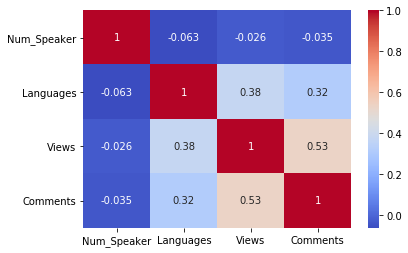

In [24]:
# Verificando a correlação das colunas numéricas

grafico1 = sns.heatmap(tedtalks.corr(),cmap='coolwarm',annot=True)

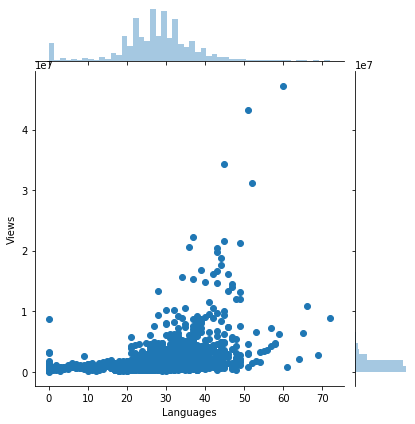

In [25]:
# Verificando a correlação entre o número de Views e o número de idiomas disponíveis

grafico2 = sns.jointplot(x='Languages',y='Views',data=tedtalks,kind='scatter')



In [26]:
len(tedtalks.loc[tedtalks['Views'] > 10000000])

34

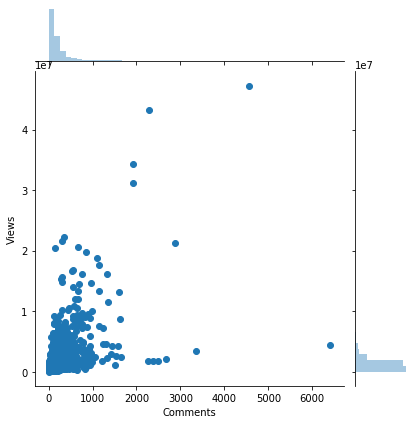

In [27]:
# Verificando a correlação entre Views e Comentários

grafico3 = sns.jointplot(x='Comments',y='Views',data=tedtalks,kind='scatter')

In [28]:
# Identificando Outliers

tedtalks.loc[tedtalks['Comments'] > 2000]

,Event,Title,Main_Speaker,Speaker_Occupation,Num_Speaker,Languages,Tags,Views,Comments
0,TED2006,Do schools kill creativity?,Ken Robinson,Author/educator,1,60,"[children', 'creativity', 'culture', 'dance...",47227110,4553
1346,TEDGlobal 2012,Your body language may shape who you are,Amy Cuddy,Social psychologist,1,51,"[body language', 'brain', 'business', 'psyc...",43155405,2290
201,TED2008,My stroke of insight,Jill Bolte Taylor,Neuroanatomist,1,49,"[biology', 'brain', 'consciousness', 'globa...",21190883,2877
96,TED2002,Militant atheism,Richard Dawkins,Evolutionary biologist,1,42,"[God', 'atheism', 'culture', 'religion', '...",4374792,6404
644,TED2010,Science can answer moral questions,Sam Harris,"Neuroscientist, philosopher",1,39,"[culture', 'evolutionary psychology', 'globa...",3433437,3356
1787,TED2014,How do you explain consciousness?,David Chalmers,Philosopher,1,33,"[brain', 'consciousness', 'neuroscience', '...",2162764,2673
840,TEDxRainier,On reading the Koran,Lesley Hazleton,"Writer, psychologist",1,35,"[TEDx', 'culture', 'global issues', 'journa...",1847256,2374
661,TED2010,The danger of science denial,Michael Specter,Writer,1,31,"[global issues', 'medicine', 'religion', 's...",1838628,2272
954,TED2011,Taking imagination seriously,Janet Echelman,Artist,1,35,"[art', 'cities', 'culture', 'data', 'desig...",1832930,2492


In [29]:
# Verificando a correlação entre profissão do palestrante e número de views


pd.pivot_table(tedtalks, index = ["Speaker_Occupation"], aggfunc='sum').sort_values("Views", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Speaker_Occupation,,,,
Writer,13083,1360,46,133549303
Psychologist,7637,854,26,90851398
Author/educator,6894,160,4,63006281
Entrepreneur,6882,1035,31,61764022
Social psychologist,5044,236,9,56813602
Leadership expert,2461,141,4,48203767
Journalist,7832,944,33,47860783
Designer,3529,967,34,43294187
Neuroscientist,4191,574,21,40889730


In [30]:
# Verificando a correlação entre profissão do palestrante e número de comentários


pd.pivot_table(tedtalks, index = ["Speaker_Occupation"], aggfunc='sum').sort_values("Comments", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Speaker_Occupation,,,,
Writer,13083,1360,46,133549303
Philosopher,8682,475,16,35100406
Journalist,7832,944,33,47860783
Psychologist,7637,854,26,90851398
Evolutionary biologist,7545,168,6,10884759
Author/educator,6894,160,4,63006281
Entrepreneur,6882,1035,31,61764022
Artist,5543,883,35,35248703
Social psychologist,5044,236,9,56813602


In [31]:
# Verificando a correlação entre palestrante e número de views


pd.pivot_table(tedtalks, index = ["Main_Speaker"], aggfunc='sum').sort_values("Views", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Main_Speaker,,,,
Ken Robinson,6894,160,4,63006281
Amy Cuddy,2290,51,1,43155405
Simon Sinek,2224,83,2,41113370
Brené Brown,2634,90,2,39157044
Julian Treasure,1189,195,5,30927659
Hans Rosling,3085,353,9,27567127
James Veitch,196,80,2,26187805
Mary Roach,354,37,1,22270883
Dan Gilbert,1448,116,3,21796454


In [32]:
# Verificando a correlação entre palestrante e número de comentários


pd.pivot_table(tedtalks, index = ["Main_Speaker"], aggfunc='sum').sort_values("Comments", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Main_Speaker,,,,
Richard Dawkins,7044,78,3,7579214
Ken Robinson,6894,160,4,63006281
Sam Harris,3846,66,2,6025998
Hans Rosling,3085,353,9,27567127
Jill Bolte Taylor,2877,49,1,21190883
Lesley Hazleton,2815,68,2,3208630
David Chalmers,2673,33,1,2162764
Brené Brown,2634,90,2,39157044
Janet Echelman,2492,35,1,1832930


In [33]:
# Verificando a correlação entre evento e número de views


pd.pivot_table(tedtalks, index = ["Event"], aggfunc='sum').sort_values("Views", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Event,,,,
TED2013,24548,2480,81,177307937
TED2014,15134,2505,85,174121423
TEDGlobal 2013,17715,2016,67,170554736
TED2015,10743,2222,78,150826305
TED2006,13433,1246,45,147345533
TED2009,18558,2611,84,145656385
TEDGlobal 2012,15289,2025,73,145070549
TED2012,16232,2141,66,144497608
TED2016,6933,2001,81,139571905


In [34]:
# Verificando a correlação entre evento e número de comentários


pd.pivot_table(tedtalks, index = ["Event"], aggfunc='sum').sort_values("Comments", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Event,,,,
TED2010,27256,2248,72,122268845
TED2013,24548,2480,81,177307937
TEDGlobal 2010,19251,1719,55,73640042
TED2011,19214,2506,72,137750504
TED2009,18558,2611,84,145656385
TEDGlobal 2013,17715,2016,67,170554736
TEDGlobal 2011,17219,2400,68,116807745
TED2012,16232,2141,66,144497608
TEDGlobal 2012,15289,2025,73,145070549


In [35]:
# Verificando a correlação entre título e número de views


pd.pivot_table(tedtalks, index = ["Title"], aggfunc='sum').sort_values("Views", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Title,,,,
Do schools kill creativity?,4553,60,1,47227110
Your body language may shape who you are,2290,51,1,43155405
How great leaders inspire action,1930,45,1,34309432
The power of vulnerability,1927,52,1,31168150
10 things you didn't know about orgasm,354,37,1,22270883
How to speak so that people want to listen,297,45,1,21594632
My stroke of insight,2877,49,1,21190883
Why we do what we do,672,36,1,20685401
This is what happens when you reply to spam email,150,43,1,20475972


In [36]:
# Verificando a correlação entre título e número de comentários


pd.pivot_table(tedtalks, index = ["Title"], aggfunc='sum').sort_values("Comments", ascending = False).head(10)

,Comments,Languages,Num_Speaker,Views
Title,,,,
Militant atheism,6404,42,1,4374792
Do schools kill creativity?,4553,60,1,47227110
Science can answer moral questions,3356,39,1,3433437
My stroke of insight,2877,49,1,21190883
How do you explain consciousness?,2673,33,1,2162764
Taking imagination seriously,2492,35,1,1832930
On reading the Koran,2374,35,1,1847256
Your body language may shape who you are,2290,51,1,43155405
The danger of science denial,2272,31,1,1838628


### Profissões dos Top 10 Palestrantes

In [37]:
# Descobrindo a profissão dos palestrantes com maior número de views


top10palestrantes = ['Ken Robinson', 'Amy Cuddy', 'Simon Sinek', 'Brené Brown', 'Mary Roach', 'Julian Treasure', 
                     'Jill Bolte Taylor', 'Tony Robbins', 'James Veitch', 'Cameron Russell']  

In [38]:
for top in top10palestrantes:
    xis = tedtalks.loc[tedtalks["Main_Speaker"] == top][["Speaker_Occupation", "Main_Speaker"]]
    print(xis)

     Speaker_Occupation  Main_Speaker
0       Author/educator  Ken Robinson
692     Author/educator  Ken Robinson
1502    Author/educator  Ken Robinson
833     Author/educator  Ken Robinson
       Speaker_Occupation Main_Speaker
1346  Social psychologist    Amy Cuddy
     Speaker_Occupation Main_Speaker
677   Leadership expert  Simon Sinek
1747  Leadership expert  Simon Sinek
            Speaker_Occupation Main_Speaker
837   Vulnerability researcher  Brené Brown
1177  Vulnerability researcher  Brené Brown
    Speaker_Occupation Main_Speaker
452             Writer   Mary Roach
     Speaker_Occupation     Main_Speaker
1776   Sound consultant  Julian Treasure
990    Sound consultant  Julian Treasure
537    Sound consultant  Julian Treasure
1333   Sound consultant  Julian Treasure
775    Sound consultant  Julian Treasure
    Speaker_Occupation       Main_Speaker
201     Neuroanatomist  Jill Bolte Taylor
                            Speaker_Occupation  Main_Speaker
5  Life coach; expert in l

### Média, máximo, mínimo e soma de Views e Comentários

In [43]:
tedtalks['Views'].max()

47227110

In [44]:
tedtalks['Views'].min()

50443

In [45]:
tedtalks['Views'].mean()

1698297.4815686275

In [42]:
tedtalks['Views'].sum()

4330658578

In [46]:
tedtalks['Comments'].max()

6404

In [47]:
tedtalks['Comments'].min()

2

In [48]:
tedtalks['Comments'].mean()

191.56235294117647

In [53]:
tedtalks['Comments'].sum()

488484

In [55]:
# Salvando em csv

tedtalks.to_csv(r'C:\Users\marim\Documents\IRONHACK\PROJETO SEMANA 4\DFTEDTALKS.csv')
